In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
train = pd.read_csv('Data/Train.csv')
test = pd.read_csv('Data/Test.csv')
sub = pd.read_excel('Data/Sample_Submission.xlsx')

In [3]:
print(train.shape)
train.head()

(543, 8)


,City,Location_Score,Internal_Audit_Score,External_Audit_Score,Fin_Score,Loss_score,Past_Results,IsUnderRisk
0,2,8.032,14,8,3,6,0,1
1,31,77.730,8,3,3,8,1,0
2,40,59.203,3,12,11,3,0,1
3,12,73.080,4,5,7,6,0,0
4,4,15.666,13,15,6,7,2,1


In [4]:
print(test.shape)
test.head()

(233, 7)


,City,Location_Score,Internal_Audit_Score,External_Audit_Score,Fin_Score,Loss_score,Past_Results
0,41,18.272,13,12,9,7,0
1,17,64.799,6,10,7,4,1
2,31,68.890,3,3,7,8,0
3,3,16.492,15,10,7,4,1
4,9,17.178,7,3,8,3,1


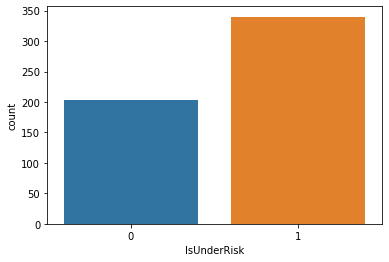

In [5]:
sns.countplot(train['IsUnderRisk'])
plt.show()

In [6]:
train.describe()

,City,Location_Score,Internal_Audit_Score,External_Audit_Score,Fin_Score,Loss_score,Past_Results,IsUnderRisk
count,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000
mean,19.576427,32.259346,8.189687,7.327808,7.046041,5.530387,0.613260,0.626151
std,14.722687,24.887291,3.312022,3.450667,3.156978,1.839124,0.764509,0.484270
min,0.000000,5.185000,3.000000,3.000000,3.000000,3.000000,0.000000,0.000000
25%,6.000000,13.565000,6.000000,5.000000,5.000000,4.000000,0.000000,0.000000
50%,14.000000,19.803000,8.000000,7.000000,7.000000,6.000000,1.000000,1.000000
75%,37.000000,62.594000,11.000000,10.000000,8.000000,7.000000,1.000000,1.000000
max,44.000000,80.809000,15.000000,15.000000,15.000000,13.000000,10.000000,1.000000


In [7]:
train['Location_Score'] = np.log(train['Location_Score'])

In [8]:
train.describe()

,City,Location_Score,Internal_Audit_Score,External_Audit_Score,Fin_Score,Loss_score,Past_Results,IsUnderRisk
count,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000
mean,19.576427,3.172367,8.189687,7.327808,7.046041,5.530387,0.613260,0.626151
std,14.722687,0.780196,3.312022,3.450667,3.156978,1.839124,0.764509,0.484270
min,0.000000,1.645770,3.000000,3.000000,3.000000,3.000000,0.000000,0.000000
25%,6.000000,2.607493,6.000000,5.000000,5.000000,4.000000,0.000000,0.000000
50%,14.000000,2.985833,8.000000,7.000000,7.000000,6.000000,1.000000,1.000000
75%,37.000000,4.136669,11.000000,10.000000,8.000000,7.000000,1.000000,1.000000
max,44.000000,4.392088,15.000000,15.000000,15.000000,13.000000,10.000000,1.000000


In [9]:
var_with_na = [var for var in train.columns if train[var].isnull().sum()>1]

for var in var_with_na:
    print(train, var)

In [10]:
X = train.iloc[:, train.columns != 'IsUnderRisk']
y = train.iloc[:, train.columns == 'IsUnderRisk']

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.20, random_state=0)

In [13]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [14]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

In [15]:
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [16]:
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)



C:\Users\EnergyWin\Anaconda3\envs\tensor\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\EnergyWin\Anaconda3\envs\tensor\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


In [17]:
from sklearn.metrics import classification_report, confusion_matrix
cr = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

In [18]:
print(cm)

[[42  3]
 [11 53]]


In [19]:
print(cr)

              precision    recall  f1-score   support

           0       0.79      0.93      0.86        45
           1       0.95      0.83      0.88        64

    accuracy                           0.87       109
   macro avg       0.87      0.88      0.87       109
weighted avg       0.88      0.87      0.87       109



In [20]:
from keras.models import Sequential 
from keras.layers import Dense, Activation, Dropout
from keras.callbacks import EarlyStopping

Using TensorFlow backend.
C:\Users\EnergyWin\Anaconda3\envs\tensor\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\EnergyWin\Anaconda3\envs\tensor\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\EnergyWin\Anaconda3\envs\tensor\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\EnergyWin\Anaconda3\env

In [21]:
model = Sequential()
model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))
model.add(Dense(2,activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam')

W0822 01:49:50.052345  2248 deprecation_wrapper.py:119] From C:\Users\EnergyWin\Anaconda3\envs\tensor\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0822 01:49:50.113435  2248 deprecation_wrapper.py:119] From C:\Users\EnergyWin\Anaconda3\envs\tensor\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [22]:
model.fit(x=X_train,y=y_train.values,epochs=2, validation_data=(X_test,y_test.values), verbose=1)

W0822 01:49:50.209575  2248 deprecation_wrapper.py:119] From C:\Users\EnergyWin\Anaconda3\envs\tensor\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0822 01:49:50.218044  2248 deprecation_wrapper.py:119] From C:\Users\EnergyWin\Anaconda3\envs\tensor\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0822 01:49:50.616468  2248 deprecation_wrapper.py:119] From C:\Users\EnergyWin\Anaconda3\envs\tensor\lib\site-packages\keras\backend\tensorflow_backend.py:3341: The name tf.log is deprecated. Please use tf.math.log instead.

W0822 01:49:50.960366  2248 deprecation.py:323] From C:\Users\EnergyWin\Anaconda3\envs\tensor\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.


Train on 434 samples, validate on 109 samples
Epoch 1/2
434/434 [==============================] - 3s 7ms/step - loss: 0.6196 - val_loss: 0.6332
Epoch 2/2
434/434 [==============================] - 0s 190us/step - loss: 0.5924 - val_loss: 0.6086


In [23]:
model_loss = pd.DataFrame(model.history.history)

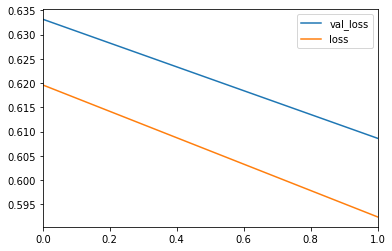

In [24]:
model_loss.plot()

In [25]:
model = Sequential()
model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))
model.add(Dense(2,activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam')

In [26]:
early_stop = EarlyStopping(monitor='val_loss', mode='max', verbose=1, patience=25)

In [27]:
model.fit(x=X_train,y=y_train.values,epochs=600,validation_data=(X_test, y_test.values), verbose=1,callbacks=[early_stop])

Train on 434 samples, validate on 109 samples
Epoch 1/600
434/434 [==============================] - 3s 8ms/step - loss: 0.6255 - val_loss: 0.6726
Epoch 2/600
434/434 [==============================] - 0s 236us/step - loss: 0.5998 - val_loss: 0.6373
Epoch 3/600
434/434 [==============================] - 0s 219us/step - loss: 0.5775 - val_loss: 0.6104
Epoch 4/600
434/434 [==============================] - 0s 224us/step - loss: 0.5568 - val_loss: 0.5870
Epoch 5/600
434/434 [==============================] - 0s 249us/step - loss: 0.5341 - val_loss: 0.5609
Epoch 6/600
434/434 [==============================] - 0s 196us/step - loss: 0.5107 - val_loss: 0.5325
Epoch 7/600
434/434 [==============================] - 0s 212us/step - loss: 0.4865 - val_loss: 0.5044
Epoch 8/600
434/434 [==============================] - 0s 219us/step - loss: 0.4618 - val_loss: 0.4788
Epoch 9/600
434/434 [==============================] - 0s 226us/step - loss: 0.4387 - val_loss: 0.4521
Epoch 10/600
434/434 [=======

In [28]:
model_loss = pd.DataFrame(model.history.history)

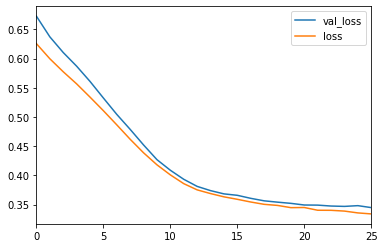

In [29]:
model_loss.plot()

In [30]:
from sklearn.metrics import classification_report,confusion_matrix

In [31]:
predictions = model.predict_classes(X_test)

In [32]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.78      0.80      0.79        45
           1       0.86      0.84      0.85        64

    accuracy                           0.83       109
   macro avg       0.82      0.82      0.82       109
weighted avg       0.83      0.83      0.83       109



In [33]:
print(confusion_matrix(y_test, predictions))

[[36  9]
 [10 54]]


In [34]:
predictions = model.predict_classes(test)

In [35]:
submission = pd.DataFrame(data=predictions)
submission.head()
submission.to_csv('Predictions.csv')